# "2019 March Portfolio BackTest"
> "2019 March portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [2]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [3]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [4]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [5]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190301].loc[df_testp.Date<=20190401].copy().reset_index()

**Long-Short Portfolio**

In [6]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [7]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [8]:
#hide_input
df_testp.head()

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,1283,CIRCOR INTERNATIONAL INC,20190301,CIR,-1.0,1.0,0.163565,0.341336,0.495099,0.974725,...,0.911686,0.966392,1.008623,0.939292,0.995778,1.000000,1.000000,1.000000,1.000000,0
1,1284,Enstar Group LTD,20190301,ESGR,-1.0,1.0,0.120056,0.348889,0.531055,0.914326,...,0.877578,1.001502,0.912955,0.994061,0.965542,1.008623,0.974725,0.915552,0.911686,1
2,1285,UMB FINANCIAL CORP,20190301,UMBF,-1.0,1.0,0.110162,0.302216,0.587622,0.992345,...,0.956095,1.001020,0.991334,0.975404,0.987765,0.920828,0.891217,0.832142,0.800075,2
3,1286,PROVIDENT FINANCIAL SERVICES INC,20190301,PFS,-1.0,1.0,0.182434,0.343610,0.473956,0.986242,...,0.958726,0.999633,0.986604,0.986417,0.985486,0.912848,0.884395,0.805461,0.764948,3
4,1287,"Strategic Education, Inc.",20190301,STRA,-1.0,1.0,0.167802,0.371042,0.461156,0.980707,...,0.941705,0.997679,0.982989,0.981949,0.977883,0.900620,0.872227,0.783589,0.733375,4


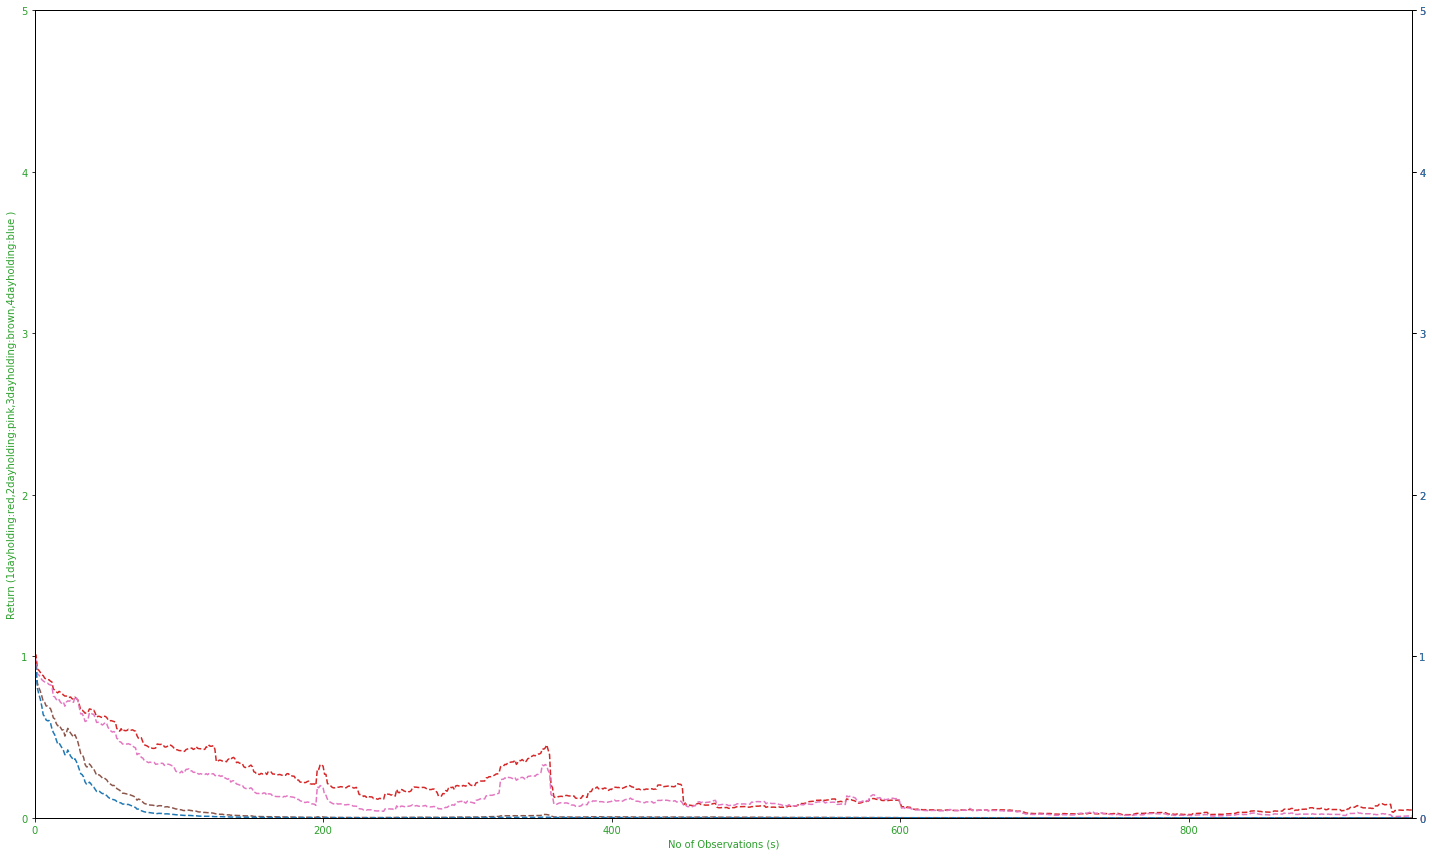

In [21]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [10]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='prof1.0',ascending=False).reset_index()


In [11]:
#hide_input
df_long['indexx']=range(len(df_long))

In [12]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [13]:
#hide_input
df_long.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,537,1820,QCR HOLDINGS INC,20190315,QCRH,-1.0,1.0,0.139380,0.207108,0.653512,...,0.975928,0.975216,1.006381,0.992021,1.002383,1.000000,1.000000,1.000000,1.000000,0
1,311,1594,HMN FINANCIAL INC,20190308,HMNF,1.0,1.0,0.125633,0.225572,0.648795,...,1.012736,0.992453,1.000000,1.002852,1.017536,1.006381,0.981439,0.973608,0.975928,1
2,506,1789,AVALON HOLDINGS CORP,20190314,AWX,-1.0,1.0,0.124158,0.261515,0.614327,...,0.896321,0.984733,0.876254,0.992248,1.046875,1.006381,0.974031,0.969015,0.988357,2
3,192,1475,UNITED BANCSHARES INC/OH,20190304,UBOH,-1.0,1.0,0.117741,0.268323,0.613937,...,0.985843,0.990594,1.003432,1.009927,0.982051,0.881845,0.840469,0.829659,0.885886,3
4,474,1757,NORWOOD FINANCIAL CORP,20190314,NWFL,1.0,1.0,0.128594,0.257943,0.613463,...,1.008457,1.019048,0.994587,1.011682,0.983504,0.884872,0.835421,0.832862,0.873344,4


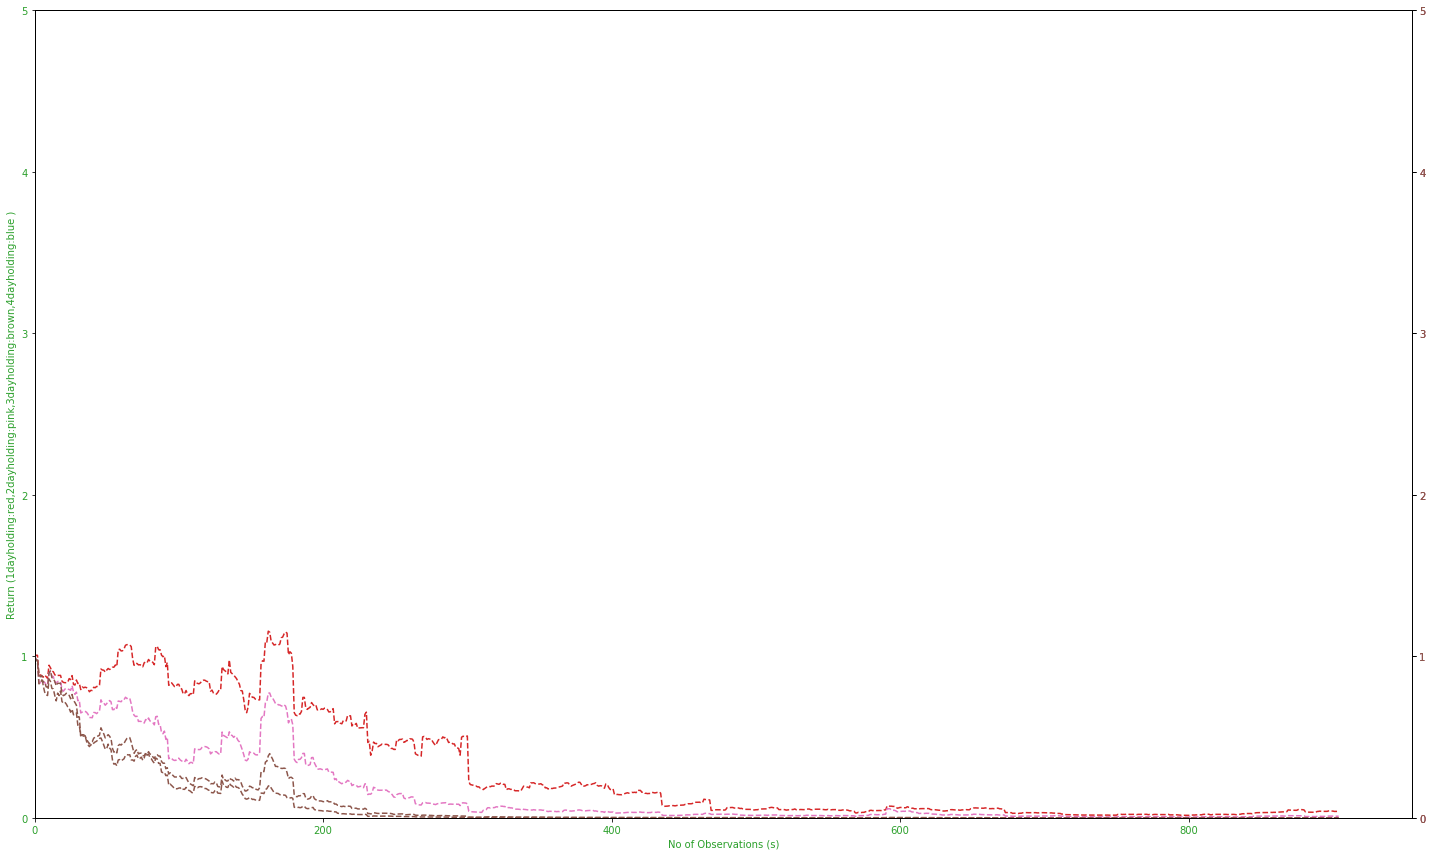

In [22]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [15]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='prof-1.0',ascending=False).reset_index()

In [16]:
#hide_input
df_short['indexx']=range(len(df_short))

In [17]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [18]:
#hide_input
df_short.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,492,1775,AVEO PHARMACEUTICALS INC,20190314,AVEO,1.0,-1.0,0.063239,0.580820,0.355940,...,0.966102,0.966102,1.016667,1.000000,0.983607,1.000000,1.000000,1.000000,1.000000,0
1,649,1932,NOVAVAX INC,20190318,NVAX,1.0,-1.0,0.090122,0.537212,0.372666,...,0.914773,0.836364,0.942308,1.015625,1.142857,1.016667,0.982203,0.982203,0.966102,1
2,646,1929,"Lightwave Logic, Inc.",20190318,LWLG,-1.0,-1.0,0.137282,0.518760,0.343957,...,1.044288,1.082645,1.047244,0.936937,0.983051,0.958013,0.774086,0.786181,0.883763,2
3,887,2170,"MRI INTERVENTIONS, INC.",20190401,MRIC,-1.0,-1.0,0.124161,0.511591,0.364249,...,1.014153,0.971429,1.000000,1.012346,1.031250,1.003273,0.877654,0.835155,0.922903,3
4,428,1711,TREVENA INC,20190313,TRVN,1.0,-1.0,0.096849,0.506911,0.396240,...,0.740970,0.938356,0.979021,0.922581,0.874251,1.003273,0.852578,0.821309,0.935966,4


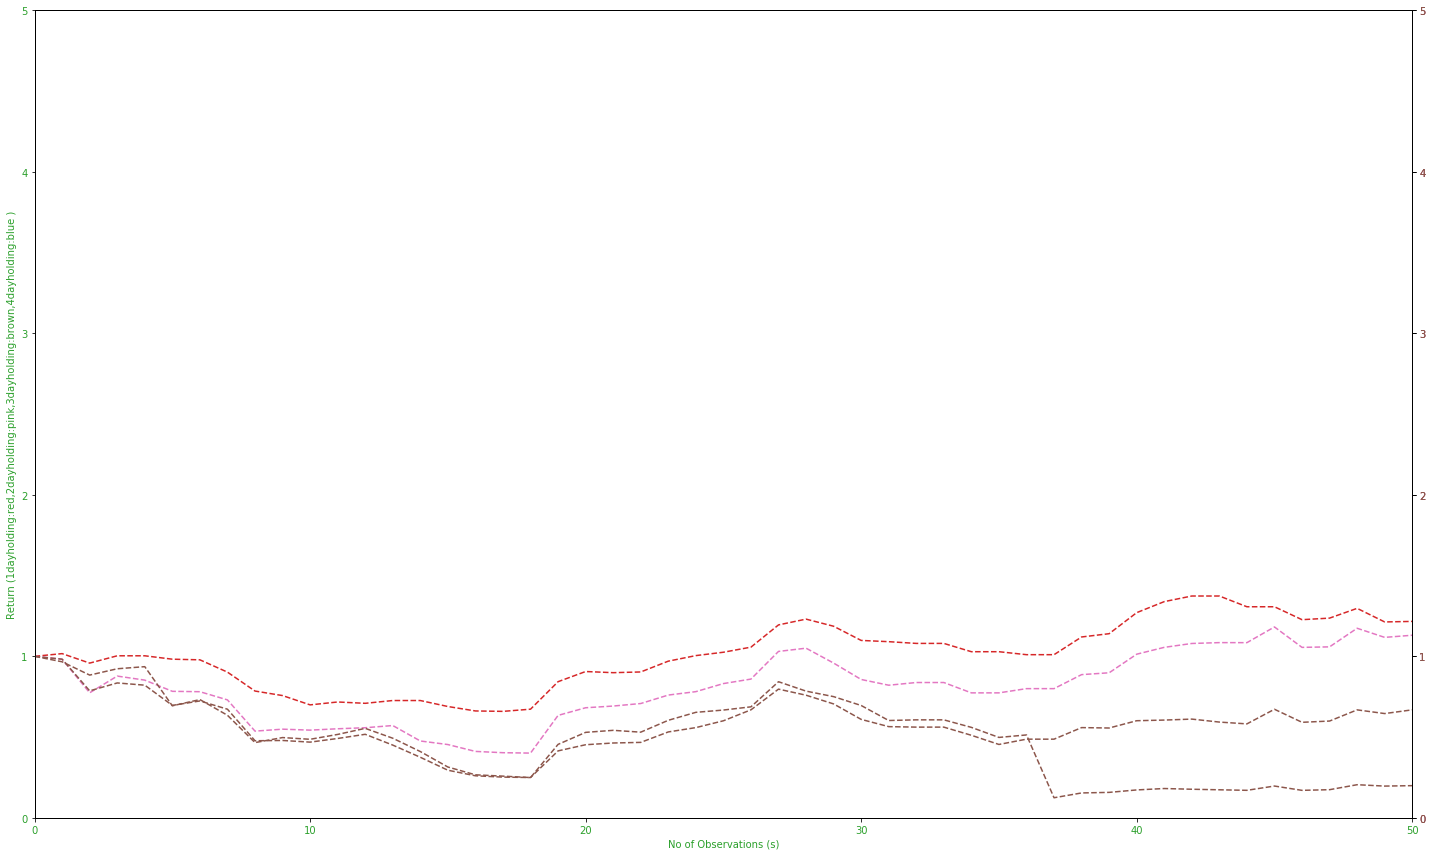

In [19]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_short['indexx'].min(),df_short['indexx'].max()
#x,y=0,100
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()